# Case 3: insights de vendas no mercado de bicicletas
_________

<!-- <img src="https://www.femmecyclist.com/wp-content/uploads/2022/12/bikes-at-a-bike-shop.jpg" width=600> -->

<img src="https://giant-bicycles.ae/wp-content/uploads/2022/05/GIANT_stores_1920x600.jpg" width=700>

Você trabalha como analista de dados na empresa "BikeWorld", uma grande varejista especializada em acessórios e equipamentos para ciclismo. A empresa está interessada em explorar dados de vendas para otimizar suas estratégias de marketing, maximizar lucros e melhorar a experiência do cliente. Recentemente, você recebeu um dataset abrangente que inclui informações detalhadas sobre vendas realizadas ao longo de vários anos.

Seu objetivo é analisar este dataset para extrair insights valiosos que ajudem a empresa a tomar decisões informadas sobre estratégias de vendas e marketing. Você deve focar em identificar padrões de vendas, entender o perfil dos clientes, e sugerir ações para aumentar as receitas e margens de lucro.

> O dataset original foi retirado [do Kaggle.](https://www.kaggle.com/datasets/sadiqshah/bike-sales-in-europe/data)

### Vamos começar!

__________
__________
__________


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("sales_data.csv")

df.columns = [x.lower() for x in df.columns]
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")

df

date  day     month  year  customer_age       age_group  \
0      2013-11-26   26  November  2013            19     Youth (<25)   
1      2015-11-26   26  November  2015            19     Youth (<25)   
2      2014-03-23   23     March  2014            49  Adults (35-64)   
3      2016-03-23   23     March  2016            49  Adults (35-64)   
4      2014-05-15   15       May  2014            47  Adults (35-64)   
...           ...  ...       ...   ...           ...             ...   
113031 2016-04-12   12     April  2016            41  Adults (35-64)   
113032 2014-04-02    2     April  2014            18     Youth (<25)   
113033 2016-04-02    2     April  2016            18     Youth (<25)   
113034 2014-03-04    4     March  2014            37  Adults (35-64)   
113035 2016-03-04    4     March  2016            37  Adults (35-64)   

       customer_gender         country             state product_category  \
0                    M          Canada  British Columbia      Accessories   
1                    M          Canada  British Columbia      Accessories   
2                    M       Australia   New South Wales      Accessories   
3                    M       Australia   New South Wales      Accessories   
4                    F       Australia   New South Wales      Accessories   
...                ...             ...               ...              ...   
113031               M  United Kingdom           England         Clothing   
113032               M       Australia        Queensland         Clothing   
113033               M       Australia        Queensland         Clothing   
113034               F          France     Seine (Paris)         Clothing   
113035               F          France     Seine (Paris)         Clothing   

       sub_category              product  order_quantity  unit_cost  \
0        Bike Racks  Hitch Rack - 4-Bike               8         45   
1        Bike Racks  Hitch Rack - 4-Bike               8         45   
2        Bike Racks  Hitch Rack - 4-Bike              23         45   
3        Bike Racks  Hitch Rack - 4-Bike              20         45   
4        Bike Racks  Hitch Rack - 4-Bike               4         45   
...             ...                  ...             ...        ...   
113031        Vests      Classic Vest, S               3         24   
113032        Vests      Classic Vest, M              22         24   
113033        Vests      Classic Vest, M              22         24   
113034        Vests      Classic Vest, L              24         24   
113035        Vests      Classic Vest, L              23         24   

        unit_price  profit  cost  revenue  
0              120     590   360      950  
1              120     590   360      950  
2              120    1366  1035     2401  
3              120    1188   900     2088  
4              120     238   180      418  
...            ...     ...   ...      ...  
113031          64     112    72      184  
113032          64     655   528     1183  
113033          64     655   528     1183  
113034          64     684   576     1260  
113035          64     655   552     1207  

[113036 rows x 18 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date              113036 non-null  datetime64[ns]
 1   day               113036 non-null  int64         
 2   month             113036 non-null  object        
 3   year              113036 non-null  int64         
 4   customer_age      113036 non-null  int64         
 5   age_group         113036 non-null  object        
 6   customer_gender   113036 non-null  object        
 7   country           113036 non-null  object        
 8   state             113036 non-null  object        
 9   product_category  113036 non-null  object        
 10  sub_category      113036 non-null  object        
 11  product           113036 non-null  object        
 12  order_quantity    113036 non-null  int64         
 13  unit_cost         113036 non-null  int64         
 14  unit

_____________

1. **Quais são as tendências de vendas ao longo do tempo?**
   - Como as vendas variam ao longo dos meses e anos?
   - Existem sazonalidades que podem ser exploradas para campanhas de marketing?

In [4]:
df.sort_values("date").head(10)

date  day    month  year  customer_age             age_group  \
60993 2011-01-01    1  January  2011            42        Adults (35-64)   
58729 2011-01-01    1  January  2011            33  Young Adults (25-34)   
58913 2011-01-01    1  January  2011            17           Youth (<25)   
63711 2011-01-01    1  January  2011            39        Adults (35-64)   
49787 2011-01-01    1  January  2011            23           Youth (<25)   
69063 2011-01-02    2  January  2011            32  Young Adults (25-34)   
69601 2011-01-02    2  January  2011            40        Adults (35-64)   
63133 2011-01-02    2  January  2011            41        Adults (35-64)   
65741 2011-01-02    2  January  2011            35        Adults (35-64)   
57953 2011-01-03    3  January  2011            29  Young Adults (25-34)   

      customer_gender         country             state product_category  \
60993               M   United States        California            Bikes   
58729               F          France           Yveline            Bikes   
58913               M          Canada  British Columbia            Bikes   
63711               M   United States        Washington            Bikes   
49787               M       Australia          Victoria            Bikes   
69063               M  United Kingdom           England            Bikes   
69601               M       Australia          Victoria            Bikes   
63133               F       Australia        Queensland            Bikes   
65741               F   United States        California            Bikes   
57953               F   United States        California            Bikes   

         sub_category                  product  order_quantity  unit_cost  \
60993      Road Bikes       Road-750 Black, 44               1        344   
58729      Road Bikes         Road-150 Red, 48               2       2171   
58913      Road Bikes         Road-250 Red, 44               1       1519   
63711      Road Bikes    Road-550-W Yellow, 38               3        713   
49787  Mountain Bikes   Mountain-200 Black, 46               1       1252   
69063      Road Bikes    Road-550-W Yellow, 38               1        713   
69601      Road Bikes    Road-550-W Yellow, 40               4        713   
63133      Road Bikes         Road-250 Red, 58               3       1555   
65741      Road Bikes    Road-550-W Yellow, 48               1        713   
57953  Mountain Bikes  Mountain-200 Silver, 42               1       1266   

       unit_price  profit  cost  revenue  
60993         540     185   344      529  
58729        3578    1097  4342     5439  
58913        2443     900  1519     2419  
63711        1120     482  2139     2621  
49787        2295     561  1252     1813  
69063        1120     362   713     1075  
69601        1120     687  2852     3539  
63133        2443    1491  4665     6156  
65741        1120     385   713     1098  
57953        2320    1008  1266     2274

In [5]:
# quantidade total de vendas em cada dia

qtdd_total = df.groupby("date")[["order_quantity"]].sum()

qtdd_total

order_quantity
date                      
2011-01-01               8
2011-01-02               9
2011-01-03              17
2011-01-04              10
2011-01-05               5
...                    ...
2016-07-27             807
2016-07-28            1332
2016-07-29             895
2016-07-30             843
2016-07-31            1267

[1884 rows x 1 columns]

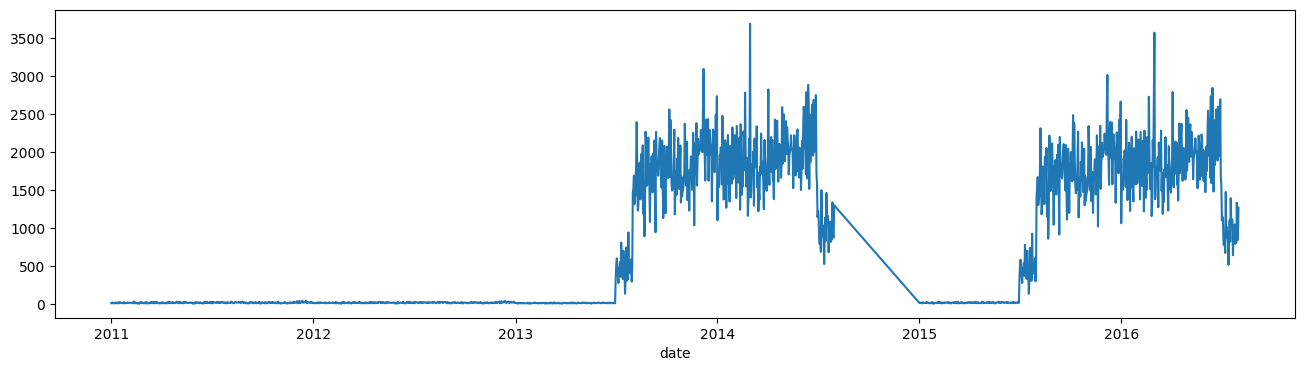

In [6]:
plt.figure(figsize=(16, 4))
sns.lineplot(x=qtdd_total.index, y=qtdd_total.values.squeeze())
plt.show()

In [7]:
qtdd_total_3d = qtdd_total.rolling(window="3D").mean()

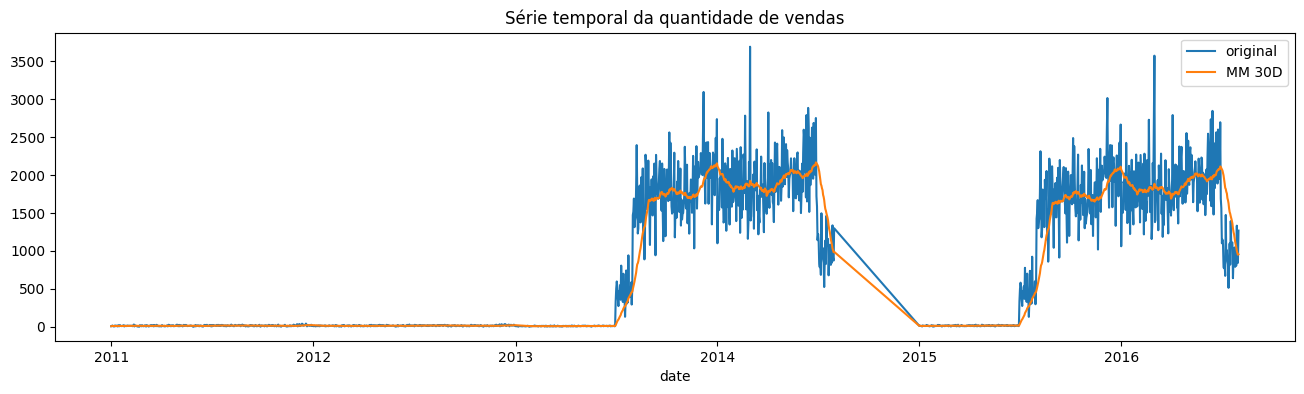

In [8]:
qtdd_total_3d = qtdd_total.rolling(window="3D").mean()
qtdd_total_30d = qtdd_total.rolling(window="30D").mean()

plt.figure(figsize=(16, 4))
plt.title("Série temporal da quantidade de vendas")

sns.lineplot(x=qtdd_total.index, y=qtdd_total.values.squeeze(), label="original")
# sns.lineplot(x=qtdd_total_3d.index, y=qtdd_total_3d.values.squeeze(), label="MM 3D")
sns.lineplot(x=qtdd_total_30d.index, y=qtdd_total_30d.values.squeeze(), label="MM 30D")

plt.show()

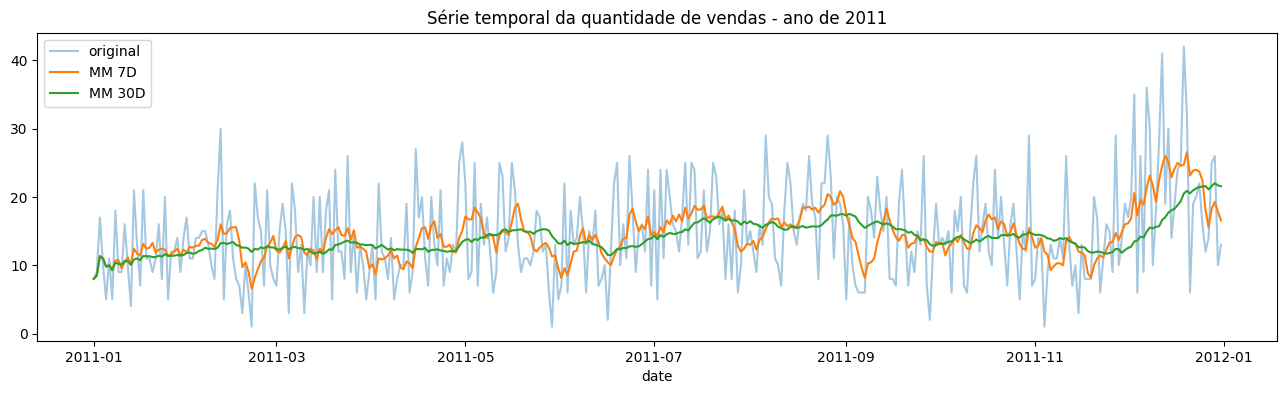

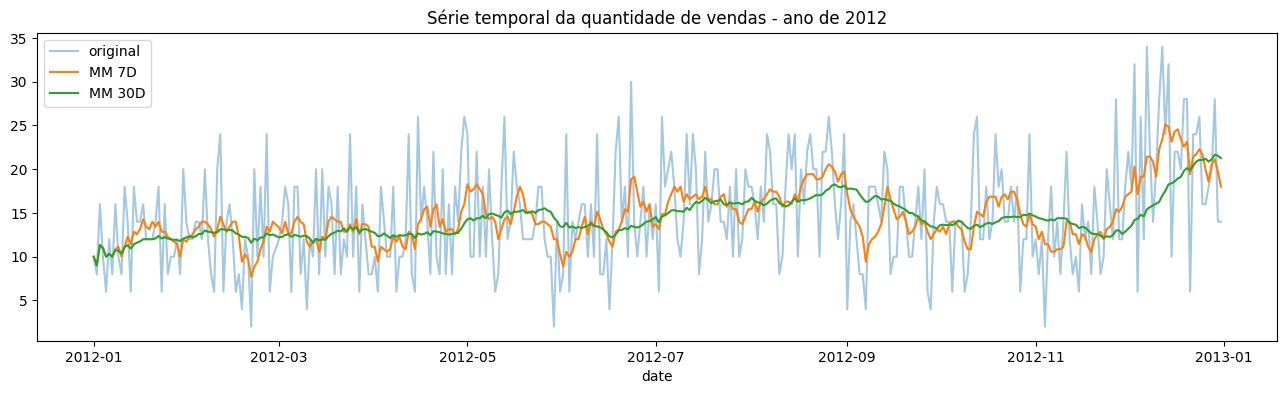

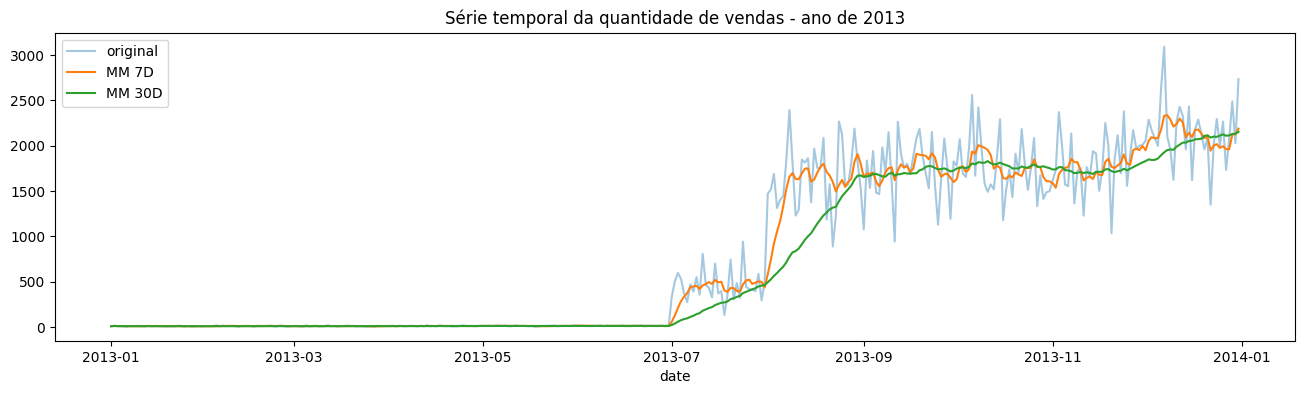

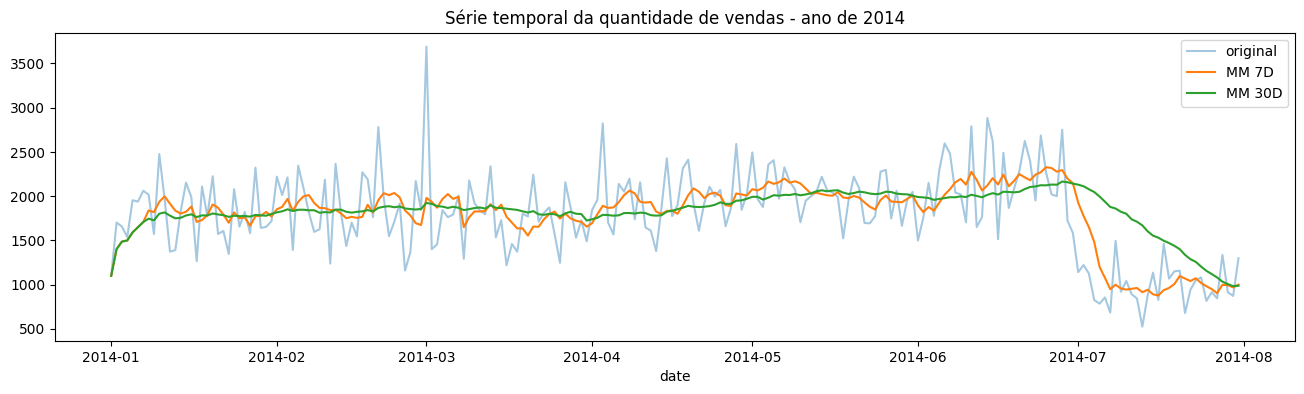

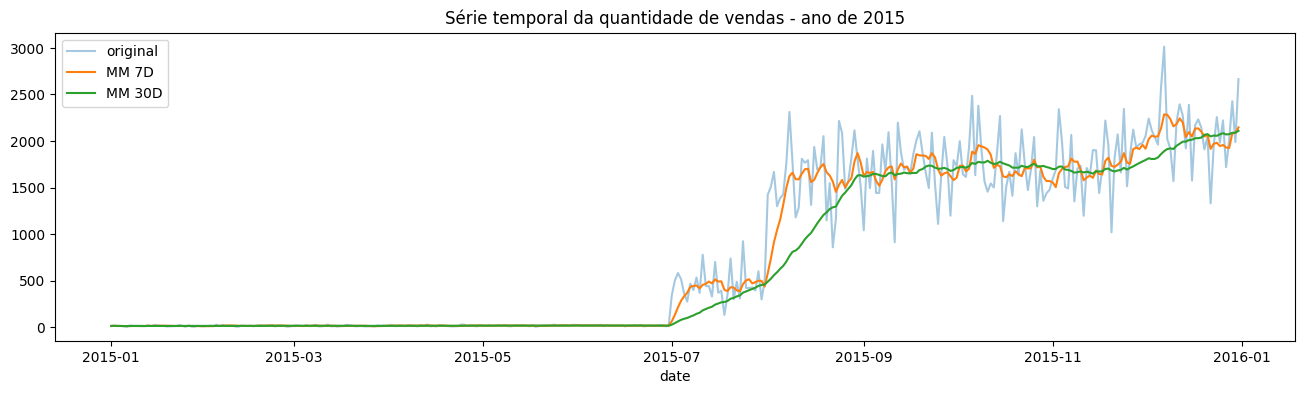

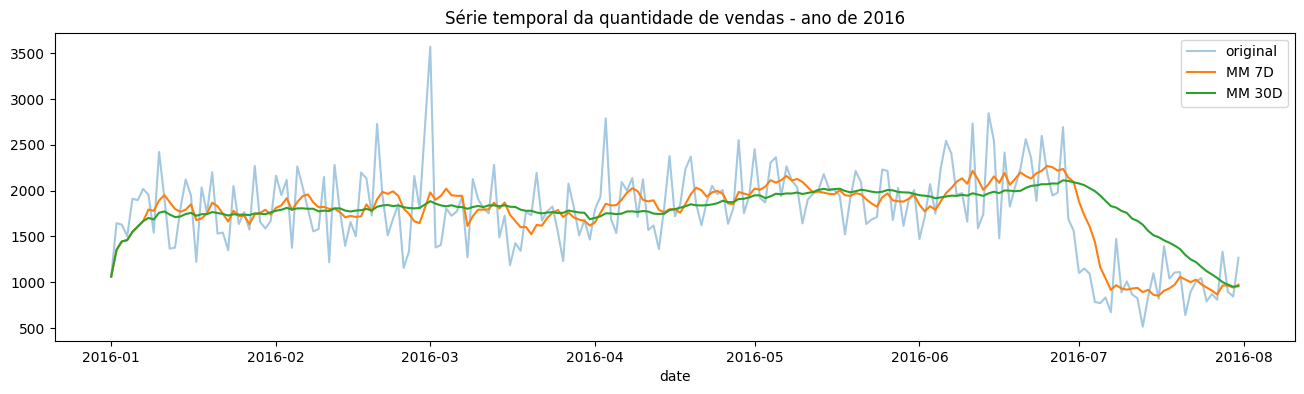

In [9]:
for ano in df["year"].sort_values().unique():

    df_ano = df.query(f"year == {ano}")

    qtdd_total = df_ano.groupby("date")[["order_quantity"]].sum()

    qtdd_total_7d = qtdd_total.rolling(window="7D").mean()
    qtdd_total_30d = qtdd_total.rolling(window="30D").mean()

    plt.figure(figsize=(16, 4))
    plt.title(f"Série temporal da quantidade de vendas - ano de {ano}")

    sns.lineplot(x=qtdd_total.index, y=qtdd_total.values.squeeze(), label="original", alpha=0.4)
    sns.lineplot(x=qtdd_total_7d.index, y=qtdd_total_7d.values.squeeze(), label="MM 7D")
    sns.lineplot(x=qtdd_total_30d.index, y=qtdd_total_30d.values.squeeze(), label="MM 30D")

    plt.show()

In [10]:
df.groupby("month")[["order_quantity"]].sum()

order_quantity
month                    
April              118467
August             103119
December           133312
February           104717
January            110367
July                89787
June               128591
March              111085
May                125715
November           108637
October            108348
September          103171

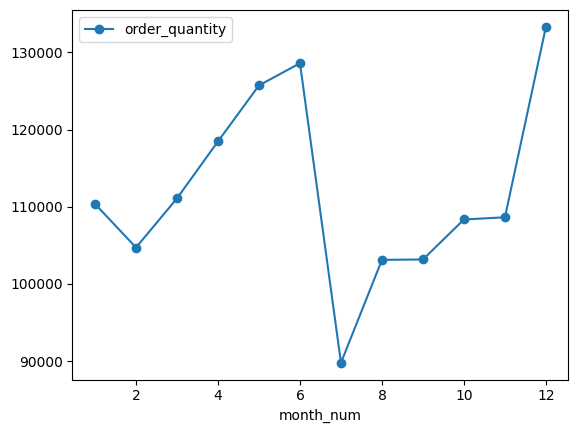

In [11]:
df["month_num"] = df["date"].apply(lambda x: x.month)

df.groupby("month_num")[["order_quantity"]].sum().plot(marker="o")
plt.show()

Quantidade mensal total de vendas - ano 2011


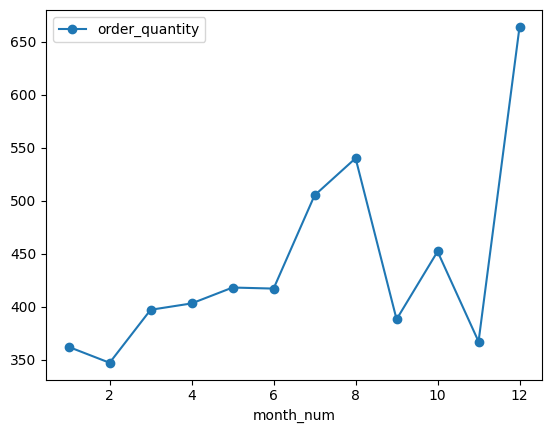

Quantidade mensal total de vendas - ano 2012


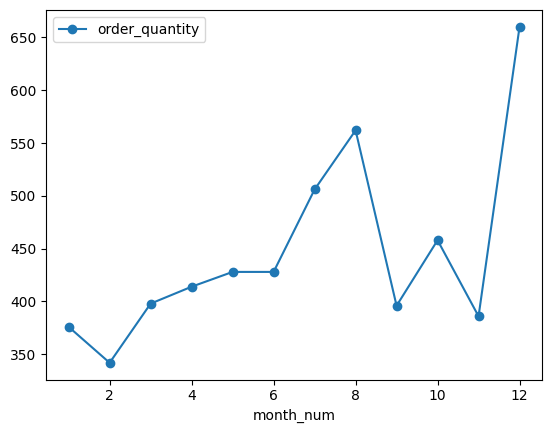

Quantidade mensal total de vendas - ano 2013


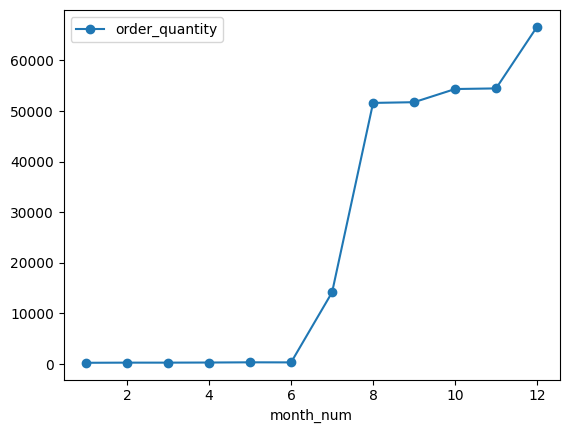

Quantidade mensal total de vendas - ano 2014


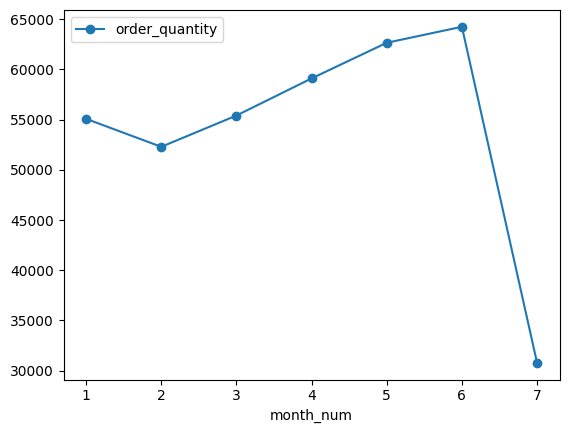

Quantidade mensal total de vendas - ano 2015


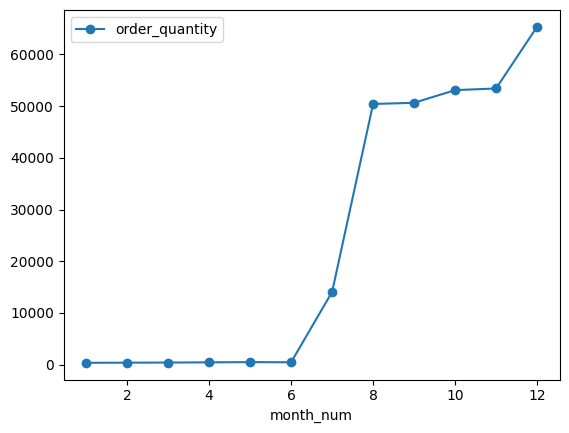

Quantidade mensal total de vendas - ano 2016


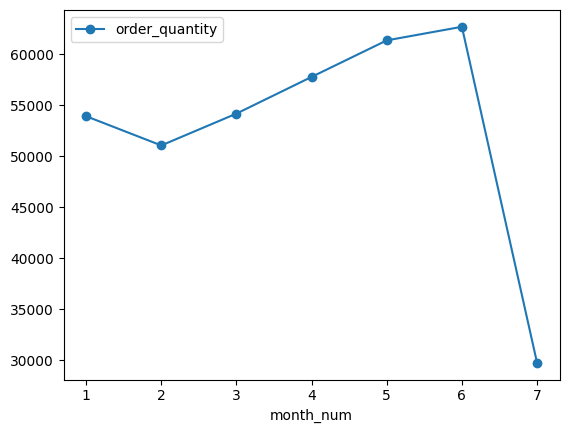

In [12]:
for ano in df["year"].sort_values().unique():

    df_ano = df.query(f"year == {ano}")

    print(f"Quantidade mensal total de vendas - ano {ano}")
    df_ano.groupby("month_num")[["order_quantity"]].sum().plot(marker="o")
    plt.show()

2. **Qual é o perfil dos clientes?**
   - Qual é a distribuição de idade dos clientes?
   - Como as vendas variam entre diferentes grupos etários e gêneros?

In [13]:
df["customer_gender"].describe()

count     113036
unique         2
top            M
freq       58312
Name: customer_gender, dtype: object

In [14]:
df["customer_gender"].value_counts()

customer_gender
M    58312
F    54724
Name: count, dtype: int64

In [15]:
df["customer_gender"].value_counts(normalize=True)

customer_gender
M    0.515871
F    0.484129
Name: proportion, dtype: float64

In [16]:
df["age_group"].describe()

count             113036
unique                 4
top       Adults (35-64)
freq               55824
Name: age_group, dtype: object

In [17]:
df["age_group"].value_counts()

age_group
Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: count, dtype: int64

In [18]:
df["customer_age"].describe()

count    113036.000000
mean         35.919212
std          11.021936
min          17.000000
25%          28.000000
50%          35.000000
75%          43.000000
max          87.000000
Name: customer_age, dtype: float64

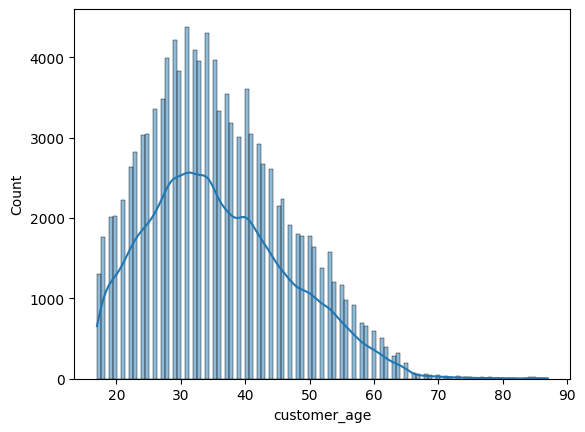

In [19]:
sns.histplot(data=df, x="customer_age", kde=True);

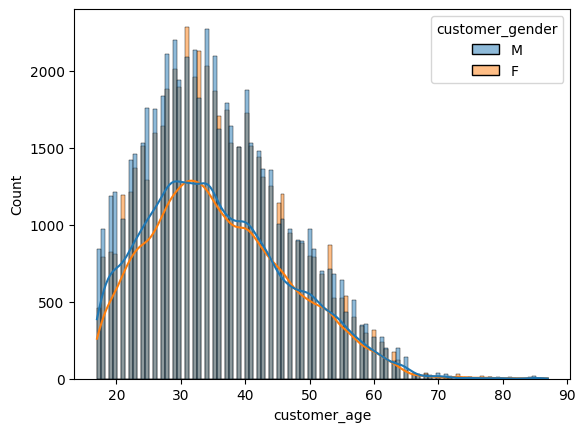

In [20]:
sns.histplot(data=df, x="customer_age", kde=True, hue="customer_gender");

### Análises ano a ano

In [21]:
for ano in df["year"].sort_values().unique():

    df_ano = df.query(f"year == {ano}")
    
    print(f"\nDistribuição de gênero - ano {ano}")
    display(df_ano["customer_gender"].value_counts(normalize=True))
    print(f"\n{'='*80}\n")


Distribuição de gênero - ano 2011


customer_gender
F    0.513261
M    0.486739
Name: proportion, dtype: float64




Distribuição de gênero - ano 2012


customer_gender
F    0.513261
M    0.486739
Name: proportion, dtype: float64




Distribuição de gênero - ano 2013


customer_gender
M    0.504112
F    0.495888
Name: proportion, dtype: float64




Distribuição de gênero - ano 2014


customer_gender
M    0.528301
F    0.471699
Name: proportion, dtype: float64




Distribuição de gênero - ano 2015


customer_gender
M    0.504112
F    0.495888
Name: proportion, dtype: float64




Distribuição de gênero - ano 2016


customer_gender
M    0.528301
F    0.471699
Name: proportion, dtype: float64

In [22]:
for ano in df["year"].sort_values().unique():

    df_ano = df.query(f"year == {ano}")
    
    print(f"\nDistribuição de faixa etária - ano {ano}")
    display(df_ano["age_group"].value_counts(normalize=True))
    print(f"\n{'='*80}\n")


Distribuição de faixa etária - ano 2011


age_group
Adults (35-64)          0.450878
Young Adults (25-34)    0.363840
Youth (<25)             0.182667
Seniors (64+)           0.002615
Name: proportion, dtype: float64




Distribuição de faixa etária - ano 2012


age_group
Adults (35-64)          0.450878
Young Adults (25-34)    0.363840
Youth (<25)             0.182667
Seniors (64+)           0.002615
Name: proportion, dtype: float64




Distribuição de faixa etária - ano 2013


age_group
Adults (35-64)          0.459682
Young Adults (25-34)    0.359408
Youth (<25)             0.175551
Seniors (64+)           0.005359
Name: proportion, dtype: float64




Distribuição de faixa etária - ano 2014


age_group
Adults (35-64)          0.526192
Young Adults (25-34)    0.325464
Youth (<25)             0.140622
Seniors (64+)           0.007722
Name: proportion, dtype: float64




Distribuição de faixa etária - ano 2015


age_group
Adults (35-64)          0.459682
Young Adults (25-34)    0.359408
Youth (<25)             0.175551
Seniors (64+)           0.005359
Name: proportion, dtype: float64




Distribuição de faixa etária - ano 2016


age_group
Adults (35-64)          0.526192
Young Adults (25-34)    0.325464
Youth (<25)             0.140622
Seniors (64+)           0.007722
Name: proportion, dtype: float64

In [23]:
df.groupby("age_group")[["order_quantity"]].sum()

order_quantity
age_group                           
Adults (35-64)                672417
Seniors (64+)                   9877
Young Adults (25-34)          446875
Youth (<25)                   216147

In [24]:
faixa_etaria_ano = df.groupby("age_group year".split())[["order_quantity"]].sum().reset_index()

faixa_etaria_ano

age_group  year  order_quantity
0         Adults (35-64)  2011            2337
1         Adults (35-64)  2012            2414
2         Adults (35-64)  2013          136850
3         Adults (35-64)  2014          200609
4         Adults (35-64)  2015          134073
5         Adults (35-64)  2016          196134
6          Seniors (64+)  2011              12
7          Seniors (64+)  2012              14
8          Seniors (64+)  2013            1998
9          Seniors (64+)  2014            3004
10         Seniors (64+)  2015            1948
11         Seniors (64+)  2016            2901
12  Young Adults (25-34)  2011            1931
13  Young Adults (25-34)  2012            1948
14  Young Adults (25-34)  2013          102071
15  Young Adults (25-34)  2014          121661
16  Young Adults (25-34)  2015          100409
17  Young Adults (25-34)  2016          118855
18           Youth (<25)  2011             980
19           Youth (<25)  2012             978
20           Youth (<25)  2013           53868
21           Youth (<25)  2014           54311
22           Youth (<25)  2015           53087
23           Youth (<25)  2016           52923

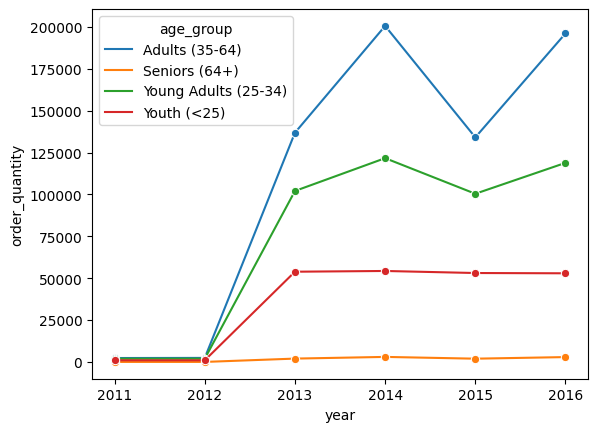

In [25]:
sns.lineplot(data=faixa_etaria_ano, x="year", y="order_quantity", hue="age_group", marker="o");

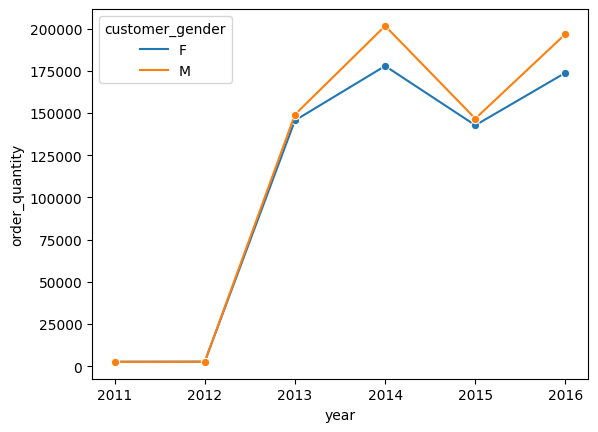

In [26]:
genero_ano = df.groupby("customer_gender year".split())[["order_quantity"]].sum().reset_index()

sns.lineplot(data=genero_ano, x="year", y="order_quantity", hue="customer_gender", marker="o");

3. **Análise Geográfica**
   - Quais são os principais mercados (países e estados) em termos de vendas?
   - Existe potencial para expansão em regiões específicas?

In [27]:
df["state"].nunique()

53

In [28]:
df["state"].unique()

array(['British Columbia', 'New South Wales', 'Victoria', 'Oregon',
       'California', 'Saarland', 'Seine Saint Denis', 'Moselle',
       'Queensland', 'England', 'Nord', 'Washington', 'Hessen',
       'Nordrhein-Westfalen', 'Hamburg', 'Loir et Cher', 'Kentucky',
       'Seine (Paris)', 'South Australia', 'Loiret', 'Alberta', 'Bayern',
       'Hauts de Seine', 'Yveline', 'Essonne', "Val d'Oise", 'Tasmania',
       'Seine et Marne', 'Val de Marne', 'Pas de Calais',
       'Charente-Maritime', 'Garonne (Haute)', 'Brandenburg', 'Texas',
       'New York', 'Florida', 'Somme', 'Illinois', 'South Carolina',
       'North Carolina', 'Georgia', 'Virginia', 'Ohio', 'Ontario',
       'Wyoming', 'Missouri', 'Montana', 'Utah', 'Minnesota',
       'Mississippi', 'Massachusetts', 'Arizona', 'Alabama'], dtype=object)

In [29]:
df["country"].nunique()

6

In [30]:
df["country"].unique()

array(['Canada', 'Australia', 'United States', 'Germany', 'France',
       'United Kingdom'], dtype=object)

### Proporção de países - por aparição na base

In [31]:
df["country"].value_counts(normalize=True)

country
United States     0.346845
Australia         0.211756
Canada            0.125429
United Kingdom    0.120493
Germany           0.098181
France            0.097296
Name: proportion, dtype: float64

In [32]:
df["country"].value_counts(normalize=True).index

Index(['United States', 'Australia', 'Canada', 'United Kingdom', 'Germany',
       'France'],
      dtype='object', name='country')

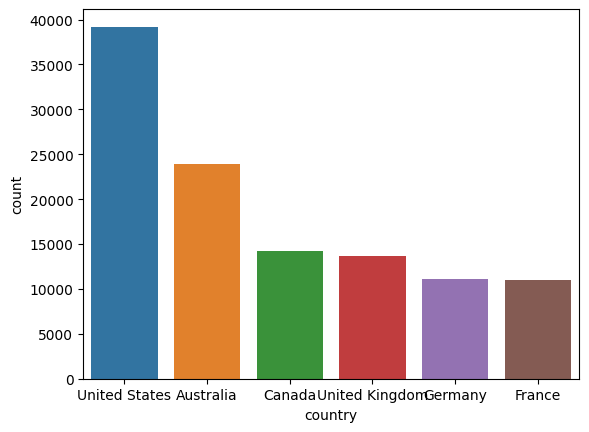

In [33]:
sns.countplot(data=df, x="country", order=df["country"].value_counts(normalize=True).index);

### Proporção de países - por quantidade vendida

In [34]:
pais_qtdd = df.groupby("country")[["order_quantity"]].sum().reset_index()
pais_qtdd

country  order_quantity
0       Australia          263585
1          Canada          192259
2          France          128995
3         Germany          125720
4  United Kingdom          157218
5   United States          477539

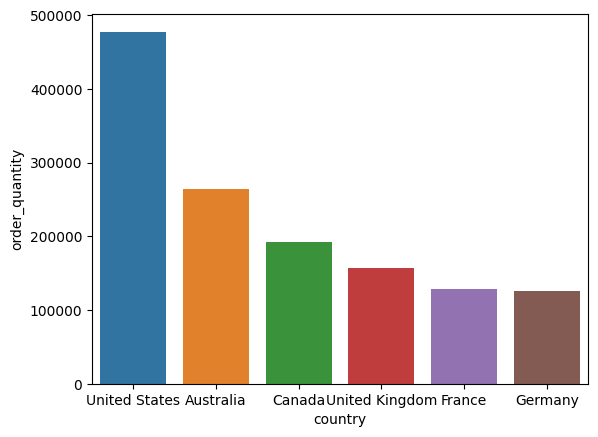

In [35]:
sns.barplot(data=pais_qtdd.sort_values("order_quantity", ascending=False), x="country", y="order_quantity");

4. **Quais são os produtos mais vendidos?**
   - Quais categorias e subcategorias de produtos são mais populares?
   - Como a demanda por diferentes produtos varia ao longo do tempo?

In [36]:
df["product"].nunique()

130

In [37]:
df["sub_category"].nunique()

17

In [38]:
df["product_category"].nunique()

3

In [39]:
df.groupby("product_category")[["product"]].nunique()

product
product_category         
Accessories            23
Bikes                  88
Clothing               23

In [40]:
df.groupby("product_category sub_category".split())[["product"]].nunique()

product
product_category sub_category              
Accessories      Bike Racks               1
                 Bike Stands              2
                 Bottles and Cages        3
                 Cleaners                 2
                 Fenders                  2
                 Helmets                  3
                 Hydration Packs          2
                 Tires and Tubes         11
Bikes            Mountain Bikes          28
                 Road Bikes              38
                 Touring Bikes           22
Clothing         Caps                     2
                 Gloves                   4
                 Jerseys                  8
                 Shorts                   3
                 Socks                    3
                 Vests                    4

In [41]:
(
    df
    .groupby("product_category".split())[["order_quantity"]]
    .sum()
    .reset_index()
    .sort_values("order_quantity", ascending=False)
)

product_category  order_quantity
0      Accessories         1054162
2         Clothing          254743
1            Bikes           36411

In [42]:
(
    df
    .groupby("product_category sub_category".split())[["order_quantity"]]
    .sum()
    .reset_index()
    .sort_values("order_quantity", ascending=False)
)

product_category       sub_category  order_quantity
7       Accessories    Tires and Tubes          514051
2       Accessories  Bottles and Cages          241726
5       Accessories            Helmets          181606
13         Clothing            Jerseys           88125
11         Clothing               Caps           67268
4       Accessories            Fenders           62138
12         Clothing             Gloves           39978
3       Accessories           Cleaners           27574
14         Clothing             Shorts           27168
6       Accessories    Hydration Packs           19914
9             Bikes         Road Bikes           19771
15         Clothing              Socks           17678
16         Clothing              Vests           14526
8             Bikes     Mountain Bikes           11992
0       Accessories         Bike Racks            4741
10            Bikes      Touring Bikes            4648
1       Accessories        Bike Stands            2412

In [43]:
# top 10 produtos mais vendidos

(
    df
    .groupby("product_category product".split())[["order_quantity"]]
    .sum()
    .reset_index()
    .sort_values("order_quantity", ascending=False)
    .head(10)
)

product_category                  product  order_quantity
22       Accessories    Water Bottle - 30 oz.          164082
14       Accessories      Patch Kit/8 Patches          157583
13       Accessories       Mountain Tire Tube          102792
111         Clothing             AWC Logo Cap           67264
19       Accessories    Sport-100 Helmet, Red           63663
16       Accessories           Road Tire Tube           62296
17       Accessories  Sport-100 Helmet, Black           62105
3        Accessories    Fender Set - Mountain           62081
21       Accessories        Touring Tire Tube           56802
18       Accessories   Sport-100 Helmet, Blue           55895

In [44]:
(
    df
    .groupby("product_category product".split())[["order_quantity"]]
    .sum()
    .reset_index()
    .sort_values("order_quantity", ascending=False)
    .tail(10)
)

product_category                  product  order_quantity
30             Bikes  Mountain-100 Silver, 48              75
24             Bikes   Mountain-100 Black, 42              73
102            Bikes    Touring-3000 Blue, 50              70
129         Clothing  Touring-1000 Yellow, 50              56
0        Accessories             AWC Logo Cap              52
81             Bikes         Road-650 Red, 52              52
49             Bikes  Mountain-500 Silver, 48              52
45             Bikes   Mountain-500 Black, 52              40
115         Clothing    Fender Set - Mountain              37
130         Clothing    Water Bottle - 30 oz.               4

In [45]:
for subcat in df["sub_category"].sort_values().unique():
    
    print(subcat)

Bike Racks
Bike Stands
Bottles and Cages
Caps
Cleaners
Fenders
Gloves
Helmets
Hydration Packs
Jerseys
Mountain Bikes
Road Bikes
Shorts
Socks
Tires and Tubes
Touring Bikes
Vests


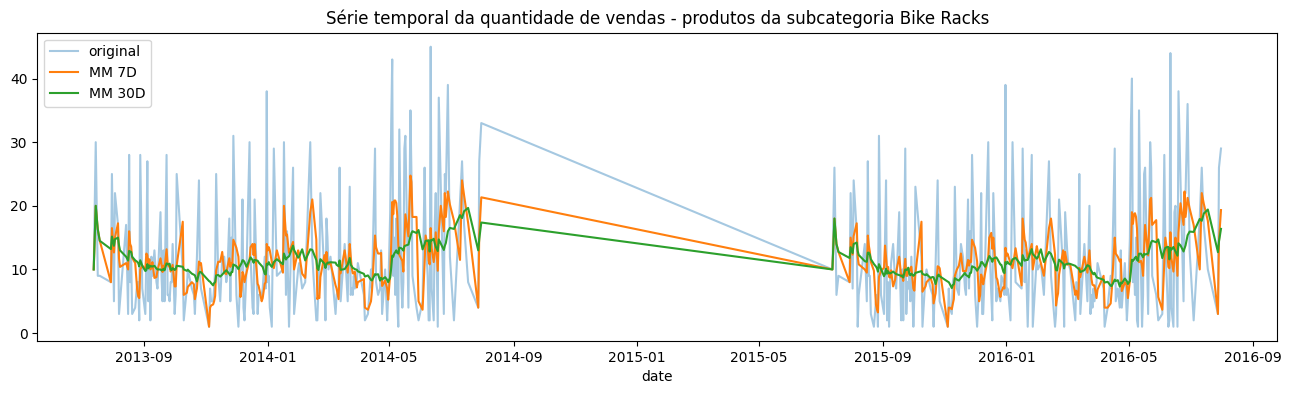

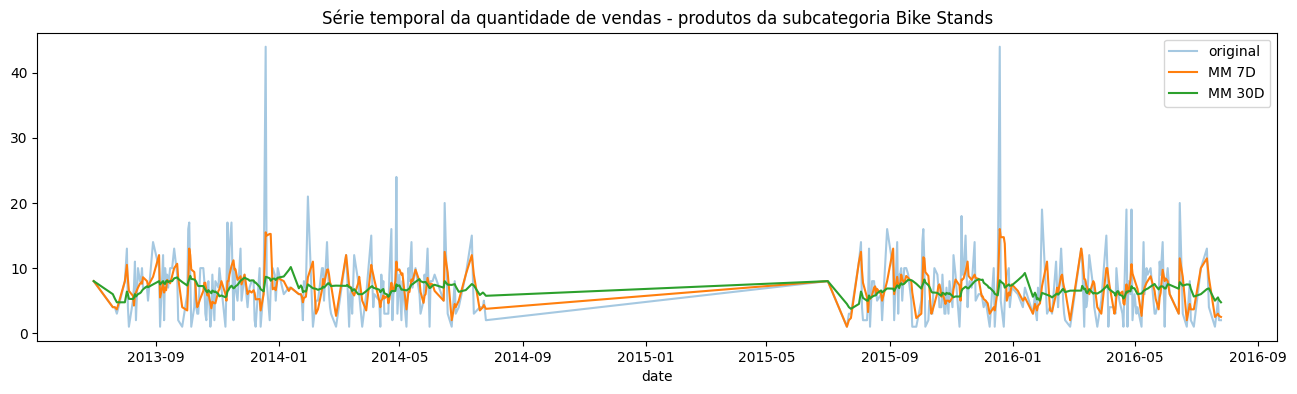

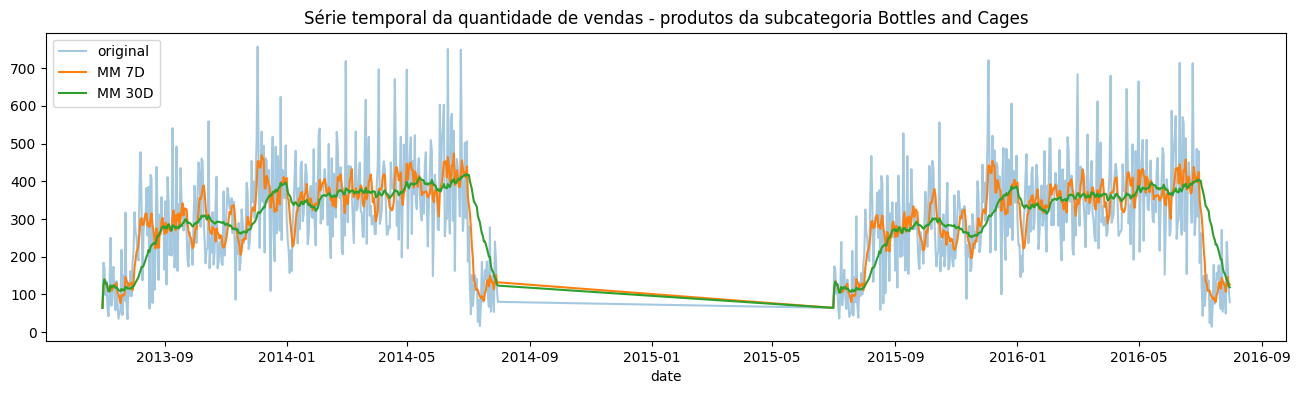

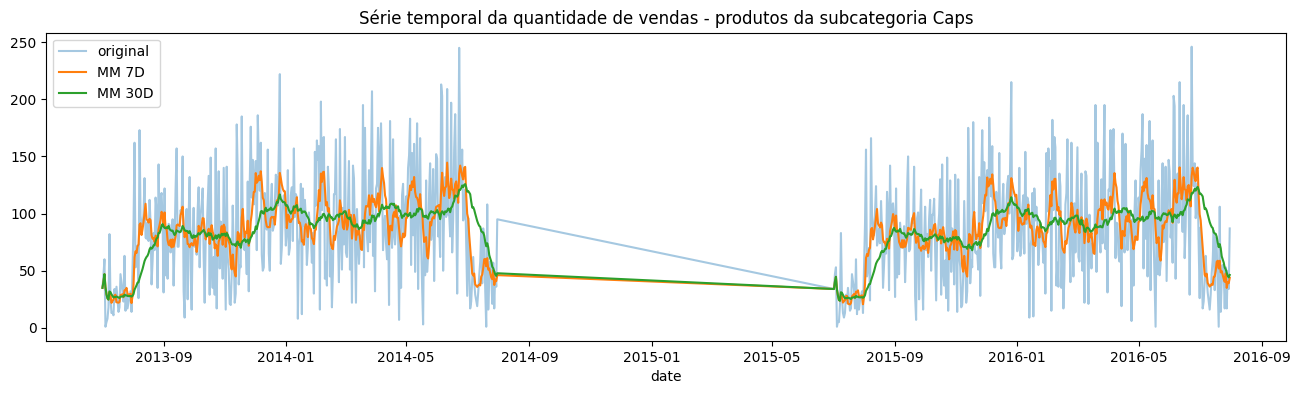

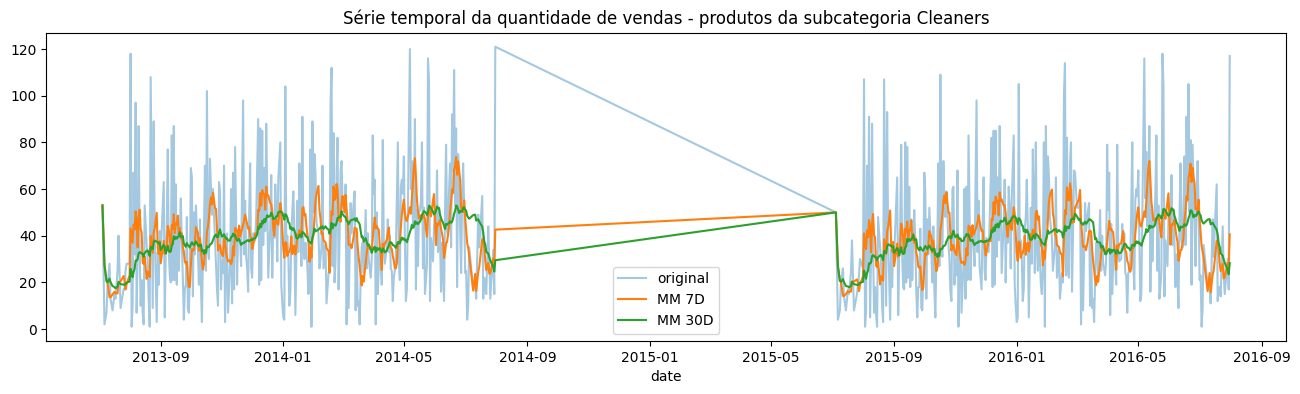

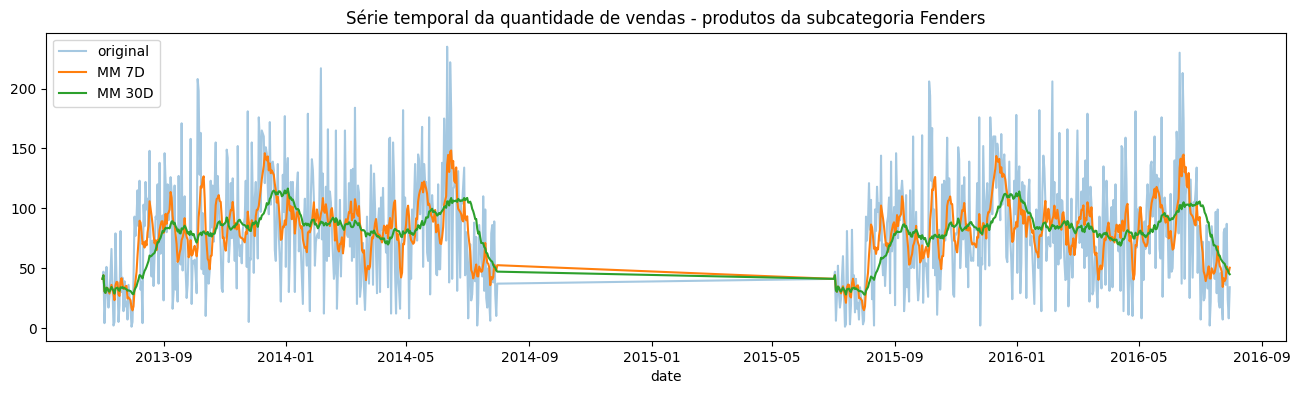

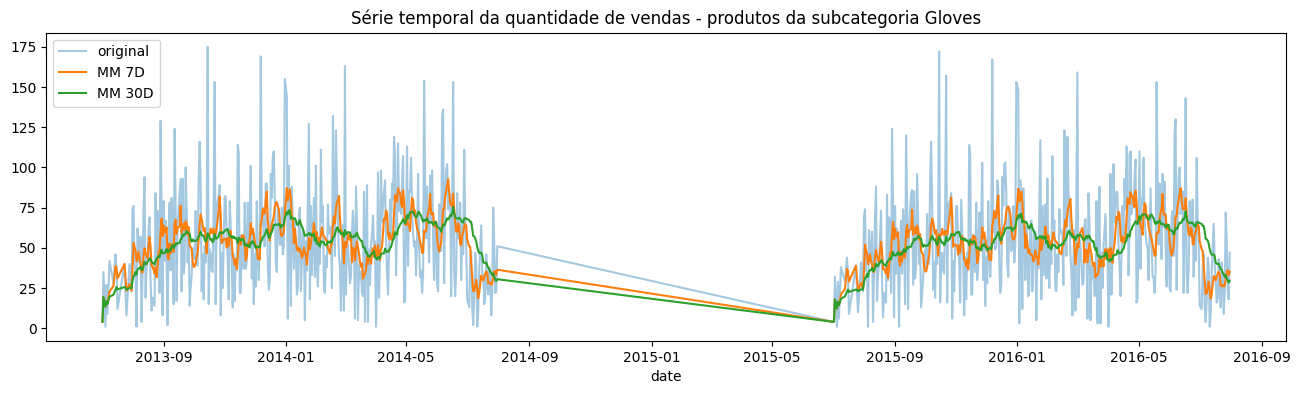

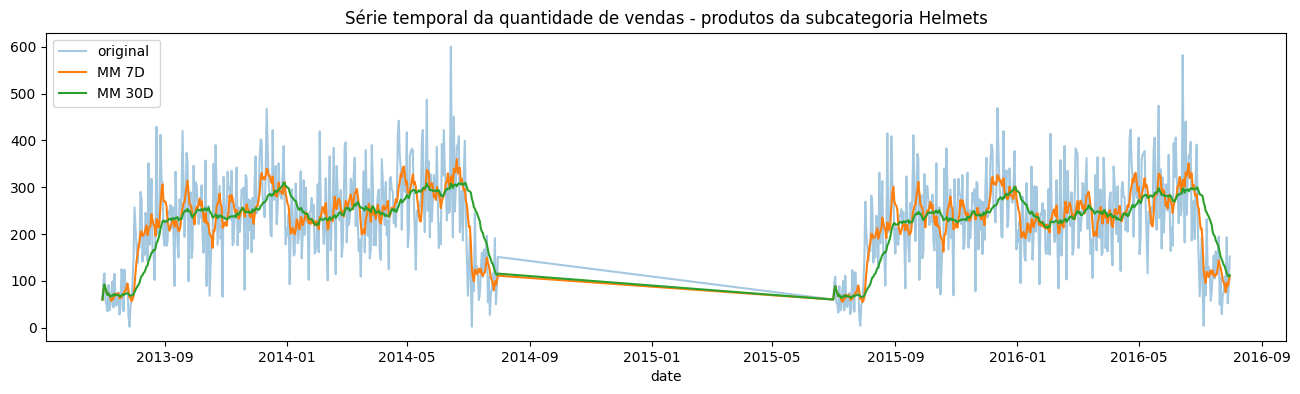

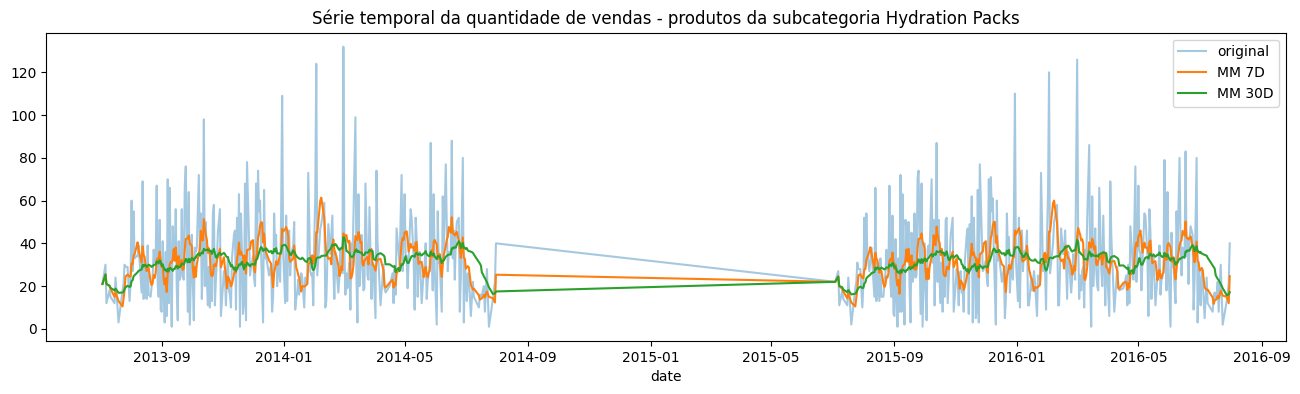

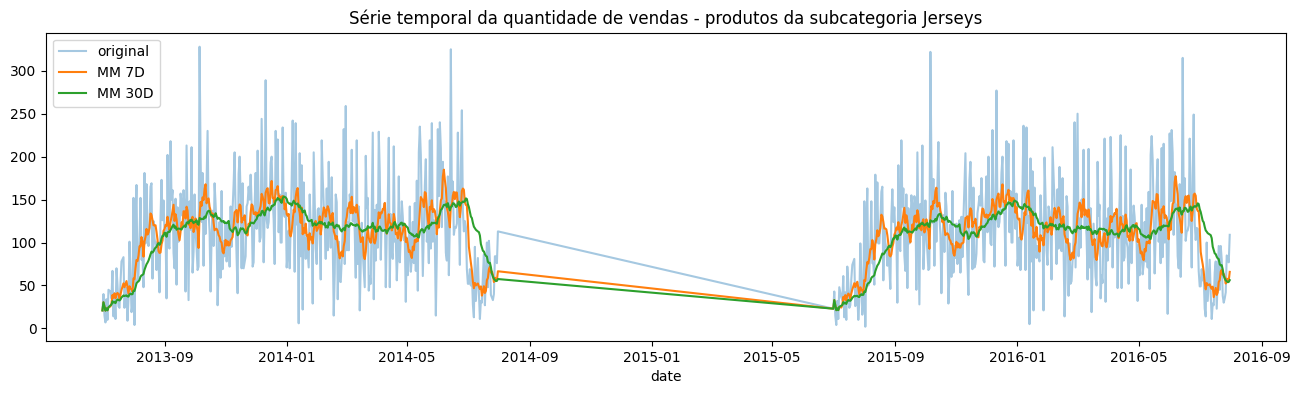

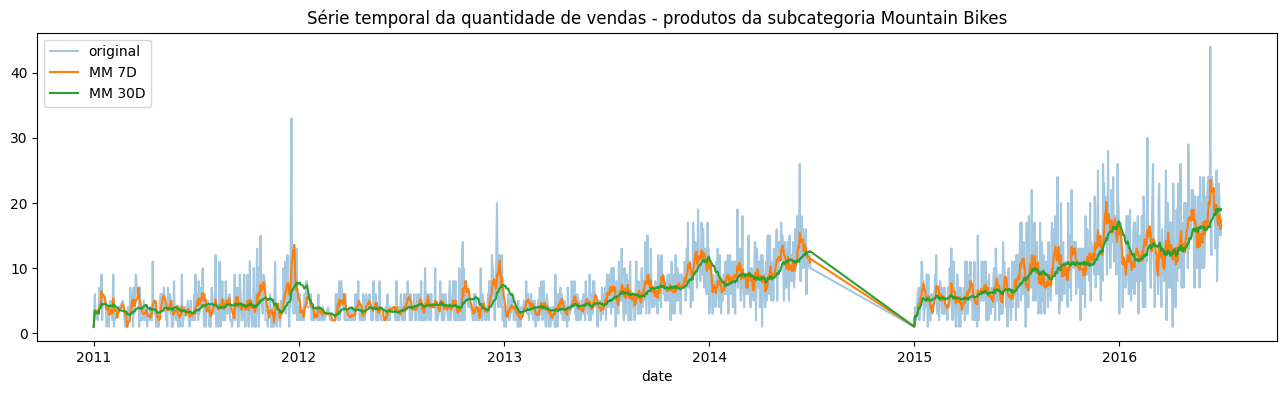

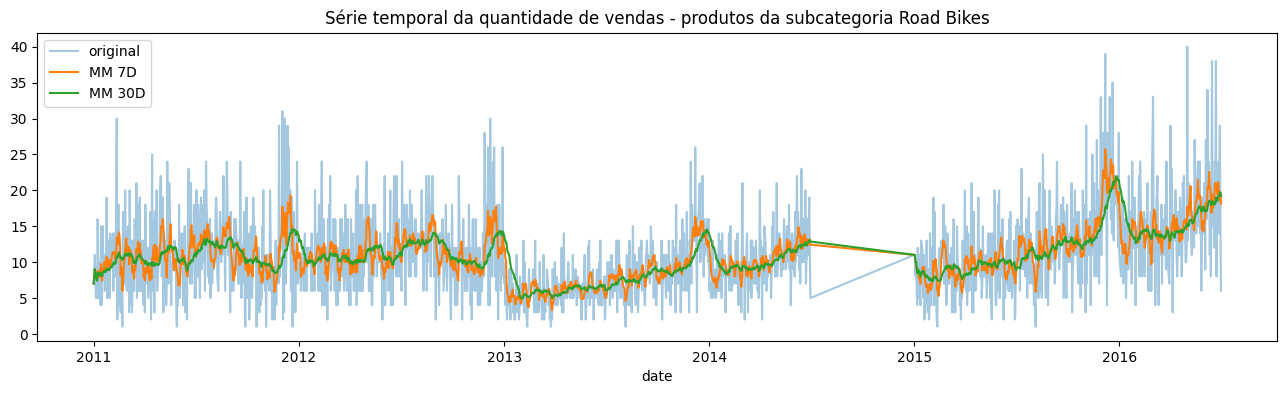

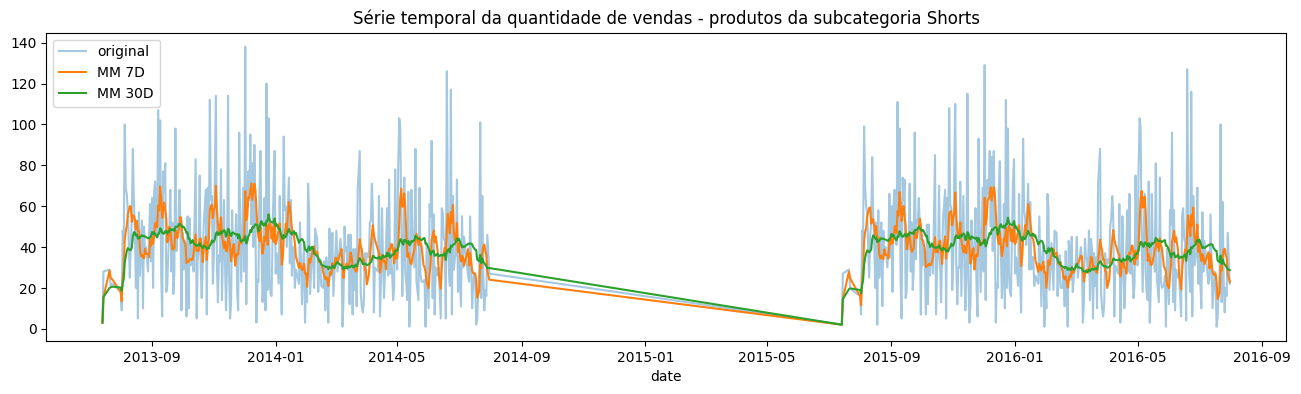

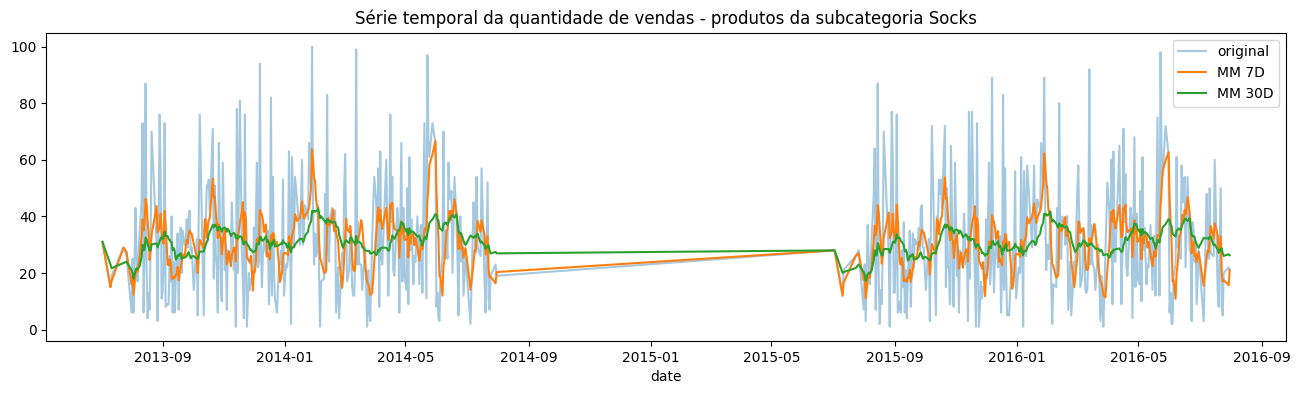

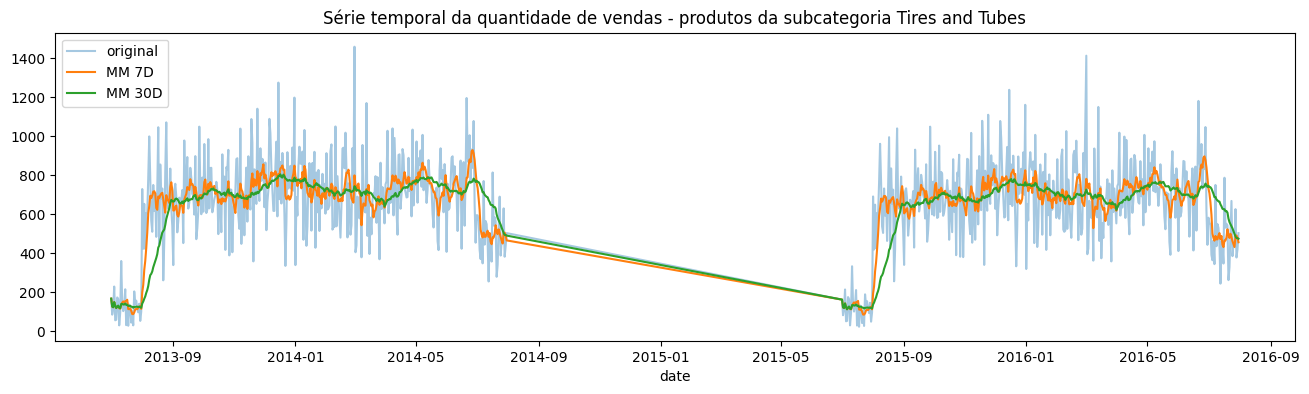

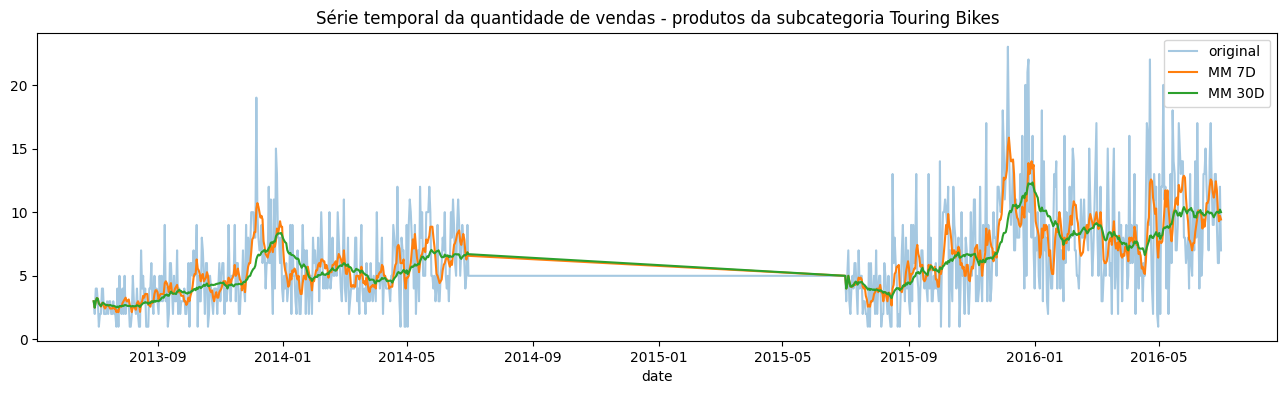

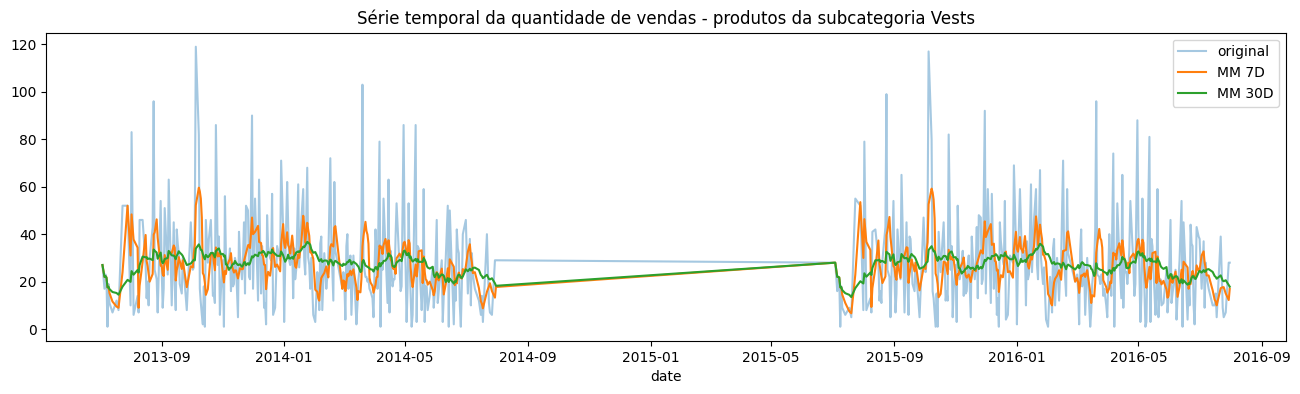

In [46]:
for subcat in df["sub_category"].sort_values().unique():

    df_category = df.query(f"sub_category == '{subcat}'")

    qtdd_total = df_category.groupby("date")[["order_quantity"]].sum()

    qtdd_total_7d = qtdd_total.rolling(window="7D").mean()
    qtdd_total_30d = qtdd_total.rolling(window="30D").mean()

    plt.figure(figsize=(16, 4))
    plt.title(f"Série temporal da quantidade de vendas - produtos da subcategoria {subcat}")

    sns.lineplot(x=qtdd_total.index, y=qtdd_total.values.squeeze(), label="original", alpha=0.4)
    sns.lineplot(x=qtdd_total_7d.index, y=qtdd_total_7d.values.squeeze(), label="MM 7D")
    sns.lineplot(x=qtdd_total_30d.index, y=qtdd_total_30d.values.squeeze(), label="MM 30D")

    plt.show()

5. **Análise de Margem de Lucro**
   - Quais produtos ou categorias têm a maior margem de lucro?
   - Como otimizar o mix de produtos para maximizar a lucratividade?

In [47]:
df["margem"] = df["profit"]/df["revenue"]

In [48]:
df["margem"].describe()

count    113036.000000
mean          0.472518
std           0.163577
min          -0.037037
25%           0.357143
50%           0.526316
75%           0.596774
max           0.750000
Name: margem, dtype: float64

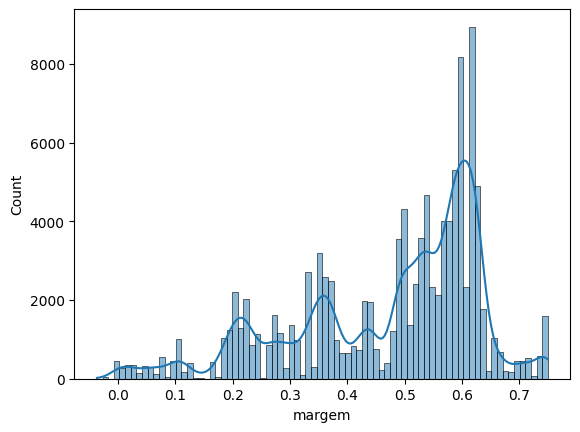

In [49]:
sns.histplot(data=df, x="margem", kde=True);

In [50]:
df["profit"].sum(), df["revenue"].sum()

(32221100, 85271008)

In [51]:
# margem de lucrto "global", em todo o período

df["profit"].sum()/df["revenue"].sum()

0.37786700023529685

In [52]:
anos = []
margens = []

for ano in df["year"].sort_values().unique():

    df_ano = df.query(f"year == {ano}")
    
    margem_ano = df_ano["profit"].sum()/df_ano["revenue"].sum()
    
    print(f"A margem de lucro de {ano} é: {margem_ano:.2%}")
    
    anos.append(ano)
    margens.append(margem_ano)

A margem de lucro de 2011 é: 32.14%
A margem de lucro de 2012 é: 32.17%
A margem de lucro de 2013 é: 39.10%
A margem de lucro de 2014 é: 41.43%
A margem de lucro de 2015 é: 37.60%
A margem de lucro de 2016 é: 39.72%


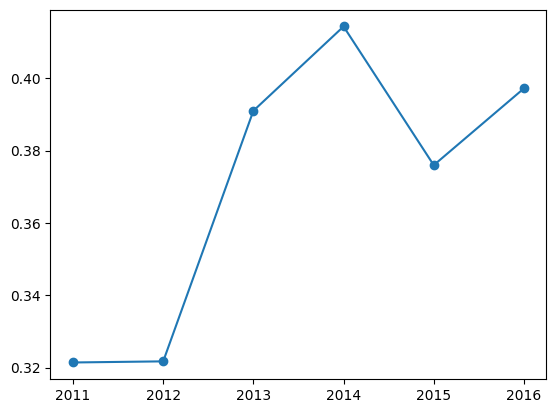

In [53]:
plt.plot(anos, margens, marker="o");

A margem de lucro para a categoria Accessories é: 58.62%


A margem de lucro para a categoria Bikes é: 33.21%


A margem de lucro para a categoria Clothing é: 33.92%


Distribuição das margens:


count    3.000000
mean     0.419181
std      0.144698
min      0.332123
25%      0.335664
50%      0.339205
75%      0.462710
max      0.586214
dtype: float64

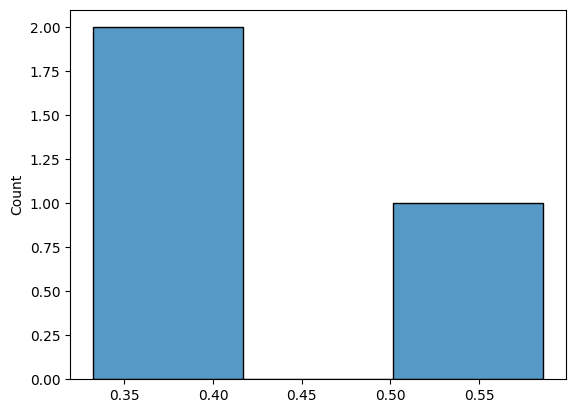

In [54]:
list_margens = []

for subcat in df["product_category"].sort_values().unique():

    df_category = df.query(f"product_category == '{subcat}'")
    
    margem_category = df_category["profit"].sum()/df_category["revenue"].sum()
    
    print(f"A margem de lucro para a categoria {subcat} é: {margem_category:.2%}")
    print(f"\n{'='*80}\n")
    
    list_margens.append(margem_category)
    
print("Distribuição das margens:")
display(pd.Series(list_margens).describe())

sns.histplot(list_margens);

A margem de lucro para a subcategoria Bike Racks é: 58.80%


A margem de lucro para a subcategoria Bike Stands é: 58.69%


A margem de lucro para a subcategoria Bottles and Cages é: 57.52%


A margem de lucro para a subcategoria Caps é: 14.20%


A margem de lucro para a subcategoria Cleaners é: 58.29%


A margem de lucro para a subcategoria Fenders é: 60.12%


A margem de lucro para a subcategoria Gloves é: 58.72%


A margem de lucro para a subcategoria Helmets é: 58.88%


A margem de lucro para a subcategoria Hydration Packs é: 57.82%


A margem de lucro para a subcategoria Jerseys é: 14.67%


A margem de lucro para a subcategoria Mountain Bikes é: 38.63%


A margem de lucro para a subcategoria Road Bikes é: 30.21%


A margem de lucro para a subcategoria Shorts é: 59.42%


A margem de lucro para a subcategoria Socks é: 63.31%


A margem de lucro para a subcategoria Tires and Tubes é: 58.40%


A margem de lucro para a subcategoria Touring Bikes é: 31.25%


A margem de lucro para a subc

count    17.000000
mean      0.490344
std       0.164715
min       0.141990
25%       0.386321
50%       0.582891
75%       0.587978
max       0.633080
dtype: float64

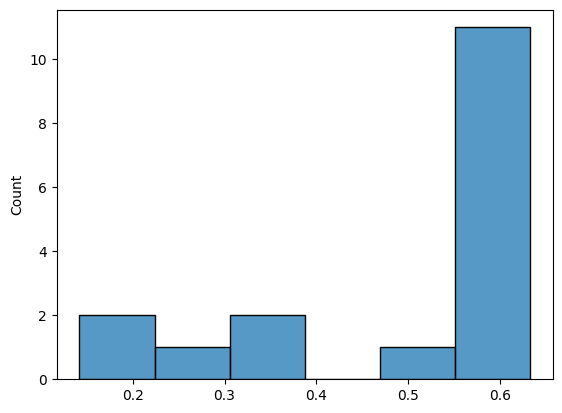

In [55]:
list_margens = []

for subcat in df["sub_category"].sort_values().unique():

    df_subcategory = df.query(f"sub_category == '{subcat}'")
    
    margem_subcategory = df_subcategory["profit"].sum()/df_subcategory["revenue"].sum()
    
    print(f"A margem de lucro para a subcategoria {subcat} é: {margem_subcategory:.2%}")
    print(f"\n{'='*80}\n")
    
    list_margens.append(margem_subcategory)
    
print("Distribuição das margens:")
display(pd.Series(list_margens).describe())

sns.histplot(list_margens);

A margem de lucro para a categoria AWC Logo Cap é: 14.20%


A margem de lucro para a categoria All-Purpose Bike Stand é: 58.68%


A margem de lucro para a categoria Bike Wash - Dissolver é: 58.37%


A margem de lucro para a categoria Classic Vest, L é: 58.50%


A margem de lucro para a categoria Classic Vest, M é: 58.02%


A margem de lucro para a categoria Classic Vest, S é: 58.98%


A margem de lucro para a categoria Fender Set - Mountain é: 60.12%


A margem de lucro para a categoria HL Mountain Tire é: 59.74%


A margem de lucro para a categoria HL Road Tire é: 58.87%


A margem de lucro para a categoria Half-Finger Gloves, L é: 58.48%


A margem de lucro para a categoria Half-Finger Gloves, M é: 58.61%


A margem de lucro para a categoria Half-Finger Gloves, S é: 59.02%


A margem de lucro para a categoria Hitch Rack - 4-Bike é: 58.81%


A margem de lucro para a categoria Hydration Pack - 70 oz. é: 57.82%


A margem de lucro para a categoria LL Mountain Tire é: 59.71%


A margem d

A margem de lucro para a categoria Touring-3000 Blue, 44 é: 31.10%


A margem de lucro para a categoria Touring-3000 Blue, 50 é: 29.38%


A margem de lucro para a categoria Touring-3000 Blue, 54 é: 31.18%


A margem de lucro para a categoria Touring-3000 Blue, 58 é: 30.87%


A margem de lucro para a categoria Touring-3000 Blue, 62 é: 27.97%


A margem de lucro para a categoria Touring-3000 Yellow, 44 é: 30.29%


A margem de lucro para a categoria Touring-3000 Yellow, 50 é: 31.52%


A margem de lucro para a categoria Touring-3000 Yellow, 54 é: 28.90%


A margem de lucro para a categoria Touring-3000 Yellow, 58 é: 30.66%


A margem de lucro para a categoria Touring-3000 Yellow, 62 é: 32.44%


A margem de lucro para a categoria Water Bottle - 30 oz. é: 56.01%


A margem de lucro para a categoria Women's Mountain Shorts, L é: 59.08%


A margem de lucro para a categoria Women's Mountain Shorts, M é: 59.55%


A margem de lucro para a categoria Women's Mountain Shorts, S é: 59.57%


Distribui

count    130.000000
mean       0.379454
std        0.137084
min        0.102301
25%        0.294074
50%        0.324585
75%        0.439841
max        0.724936
dtype: float64

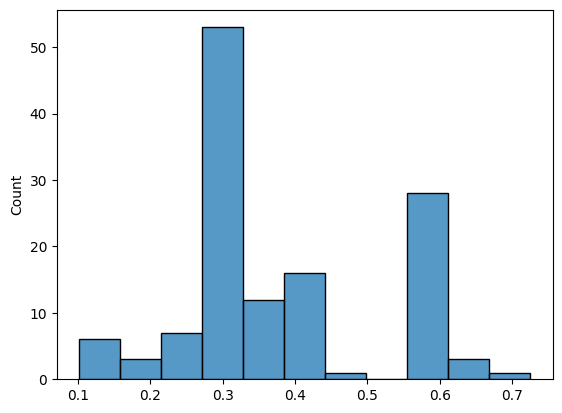

In [56]:
list_margens = []

for produto in df["product"].sort_values().unique():

    df_produto = df.query(f'product == "{produto}"')
    
    margem_produto = df_produto["profit"].sum()/df_produto["revenue"].sum()
    
    print(f"A margem de lucro para a categoria {produto} é: {margem_produto:.2%}")
    print(f"\n{'='*80}\n")
    
    list_margens.append(margem_produto)
    
print("Distribuição das margens:")
display(pd.Series(list_margens).describe())

sns.histplot(list_margens);

In [57]:
top10 = (
    df
    .groupby("product_category product".split())[["order_quantity"]]
    .sum()
    .reset_index()
    .sort_values("order_quantity", ascending=False)
    .head(10)
)["product"]

In [58]:
top10

22       Water Bottle - 30 oz.
14         Patch Kit/8 Patches
13          Mountain Tire Tube
111               AWC Logo Cap
19       Sport-100 Helmet, Red
16              Road Tire Tube
17     Sport-100 Helmet, Black
3        Fender Set - Mountain
21           Touring Tire Tube
18      Sport-100 Helmet, Blue
Name: product, dtype: object

In [59]:
for produto in top10:

    df_produto = df.query(f'product == "{produto}"')
    
    margem_produto = df_produto["profit"].sum()/df_produto["revenue"].sum()
    
    print(f"A margem de lucro para a categoria {produto} é: {margem_produto:.2%}")
    print(f"\n{'='*80}\n")

A margem de lucro para a categoria Water Bottle - 30 oz. é: 56.01%


A margem de lucro para a categoria Patch Kit/8 Patches é: 44.49%


A margem de lucro para a categoria Mountain Tire Tube é: 56.25%


A margem de lucro para a categoria AWC Logo Cap é: 14.20%


A margem de lucro para a categoria Sport-100 Helmet, Red é: 59.01%


A margem de lucro para a categoria Road Tire Tube é: 72.49%


A margem de lucro para a categoria Sport-100 Helmet, Black é: 58.57%


A margem de lucro para a categoria Fender Set - Mountain é: 60.12%


A margem de lucro para a categoria Touring Tire Tube é: 55.89%


A margem de lucro para a categoria Sport-100 Helmet, Blue é: 59.06%




6. **Eficiência de Custos**
   - Qual é a relação entre o custo unitário e o preço unitário dos produtos?
   - Existem oportunidades para reduzir custos e aumentar a margem de lucro?

In [60]:
df["custo_receita"] = df["unit_cost"]/df["unit_price"]

df["custo_receita"].describe()

count    113036.000000
mean          0.472464
std           0.138120
min           0.250000
25%           0.371429
50%           0.400000
75%           0.546296
max           0.777778
Name: custo_receita, dtype: float64

A razão custo/preço do produto AWC Logo Cap é: 77.78%


A razão custo/preço do produto All-Purpose Bike Stand é: 37.11%


A razão custo/preço do produto Bike Wash - Dissolver é: 37.50%


A razão custo/preço do produto Classic Vest, L é: 37.50%


A razão custo/preço do produto Classic Vest, M é: 37.50%


A razão custo/preço do produto Classic Vest, S é: 37.50%


A razão custo/preço do produto Fender Set - Mountain é: 36.36%


A razão custo/preço do produto HL Mountain Tire é: 37.14%


A razão custo/preço do produto HL Road Tire é: 36.36%


A razão custo/preço do produto Half-Finger Gloves, L é: 37.50%


A razão custo/preço do produto Half-Finger Gloves, M é: 37.50%


A razão custo/preço do produto Half-Finger Gloves, S é: 37.50%


A razão custo/preço do produto Hitch Rack - 4-Bike é: 37.50%


A razão custo/preço do produto Hydration Pack - 70 oz. é: 38.18%


A razão custo/preço do produto LL Mountain Tire é: 36.00%


A razão custo/preço do produto LL Road Tire é: 38.10%


A razão custo/

A razão custo/preço do produto Road-350-W Yellow, 42 é: 63.67%


A razão custo/preço do produto Road-350-W Yellow, 44 é: 63.67%


A razão custo/preço do produto Road-350-W Yellow, 48 é: 63.67%


A razão custo/preço do produto Road-550-W Yellow, 38 é: 63.66%


A razão custo/preço do produto Road-550-W Yellow, 40 é: 63.66%


A razão custo/preço do produto Road-550-W Yellow, 42 é: 63.66%


A razão custo/preço do produto Road-550-W Yellow, 44 é: 63.66%


A razão custo/preço do produto Road-550-W Yellow, 48 é: 63.66%


A razão custo/preço do produto Road-650 Black, 44 é: 62.20%


A razão custo/preço do produto Road-650 Black, 48 é: 62.20%


A razão custo/preço do produto Road-650 Black, 52 é: 62.20%


A razão custo/preço do produto Road-650 Black, 58 é: 62.20%


A razão custo/preço do produto Road-650 Black, 60 é: 62.20%


A razão custo/preço do produto Road-650 Black, 62 é: 62.20%


A razão custo/preço do produto Road-650 Red, 44 é: 62.20%


A razão custo/preço do produto Road-650 Red, 48 

count    130.000000
mean       0.554733
std        0.120097
min        0.250000
25%        0.511283
50%        0.606764
75%        0.621967
max        0.777778
dtype: float64

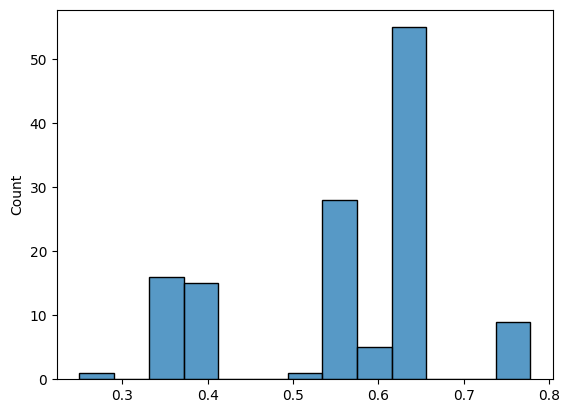

In [61]:
list_cr = []

for produto in df["product"].sort_values().unique():

    df_produto = df.query(f'product == "{produto}"')
    
    cr = df_produto["unit_cost"]/df_produto["unit_price"]
    
    for cr_unique in cr.unique():
        print(f"A razão custo/preço do produto {produto} é: {cr_unique:.2%}")
        
        list_cr.append(cr_unique)
    
    print(f"\n{'='*80}\n")
    
print("Distribuição das margens:")
display(pd.Series(list_cr).describe())

sns.histplot(list_cr);

In [62]:
for produto in top10:

    df_produto = df.query(f'product == "{produto}"')
    
    cr = df_produto["unit_cost"]/df_produto["unit_price"]
    
    for cr_unique in cr.unique():
        print(f"A razão custo/preço do produto {produto} é: {cr_unique:.2%}")
    
    print(f"\n{'='*80}\n")

A razão custo/preço do produto Water Bottle - 30 oz. é: 40.00%


A razão custo/preço do produto Patch Kit/8 Patches é: 50.00%


A razão custo/preço do produto Mountain Tire Tube é: 40.00%


A razão custo/preço do produto AWC Logo Cap é: 77.78%


A razão custo/preço do produto Sport-100 Helmet, Red é: 37.14%


A razão custo/preço do produto Road Tire Tube é: 25.00%


A razão custo/preço do produto Sport-100 Helmet, Black é: 37.14%


A razão custo/preço do produto Fender Set - Mountain é: 36.36%


A razão custo/preço do produto Touring Tire Tube é: 40.00%


A razão custo/preço do produto Sport-100 Helmet, Blue é: 37.14%




7. **Comportamento de Compra dos Clientes**
   - Qual é a frequência de compra dos clientes?
   - Existem clientes recorrentes e qual é o seu impacto nas vendas totais?

In [63]:
df.columns

Index(['date', 'day', 'month', 'year', 'customer_age', 'age_group',
       'customer_gender', 'country', 'state', 'product_category',
       'sub_category', 'product', 'order_quantity', 'unit_cost', 'unit_price',
       'profit', 'cost', 'revenue', 'month_num', 'margem', 'custo_receita'],
      dtype='object')

________

## Há mais o que explorar! Por exemplo, analisar lucro ao invés de quantidade de compras:

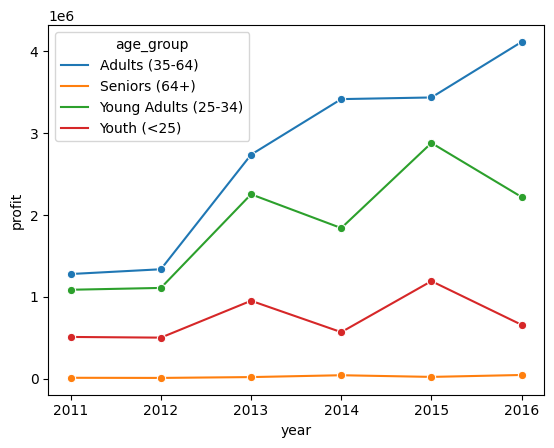

In [64]:
faixa_etaria_ano_profit = df.groupby("age_group year".split())[["profit"]].sum().reset_index()

sns.lineplot(data=faixa_etaria_ano_profit, x="year", y="profit", hue="age_group", marker="o");